In [5]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data
import scipy
import math
from scipy.ndimage import measurements
from skimage import data
from ipywidgets import interact, fixed, FloatSlider, IntSlider,FloatRangeSlider, Label

In [6]:
# https://arxiv.org/pdf/1910.00138.pdf this paper claims that the larger the sobel kernel the better the edge detection accuracy is

# Prove it..

# using a 3x3 sobel kernel
x_3_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
y_3_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# using a custom 5x5 sobel kernel
x_5_sobel = np.array([
  [1, 0, 0, 0, -1],
  [0, 0, 0, 0, 0],
  [2, 0, 0, 0, -2],
  [0, 0, 0, 0, 0],
  [1, 0, 0, 0, -1 ]
])

y_5_sobel = np.array([
  [1, 0, 2, 0, 1],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [-1, 0, -2, 0, -1]
])
# using a 7x7 extended sobel kernel
x_7_sobel = np.array([
  [1, 0, 0, 0, 0, 0, -1],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [2, 0, 0, 0, 0, 0, -2],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, -1 ]
])

y_7_sobel = np.array([
  [1, 0, 0, 2, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [-1, 0, 0, -2, 0, 0, -1]
])

In [8]:
def apply_kernel(img, x_sob, y_sob):
   
    x_value, y_value = img.shape
    x_sob_image = np.zeros((x_value, y_value))
    y_sob_image = np.zeros((x_value, y_value))
    sob_image = np.zeros((x_value, y_value))
    
    # ==================================================
    #           Apply padding to the image
    # ==================================================
    img = np.pad(img, (1, 1), 'edge')
    
    # ==================================================
    #               Perform Convolution
    # ==================================================
    for row in range(1, img.shape[0]-1):
        for col in range(1, img.shape[1]-1):
            x_sum = (x_sob.item(0, 0) * img.item(row-1, col-1)) + (x_sob.item(0, 2) * img.item(row-1, col+1)) + (x_sob.item(1, 0) * img.item(row, col-1)) + (x_sob.item(1, 2) * img.item(row, col+1)) + (x_sob.item(2, 0) * img.item(row+1, col-1)) + (x_sob.item(2, 2) * img.item(row+1, col+1))
            y_sum = (y_sob.item(0, 0) * img.item(row-1, col-1)) + (y_sob.item(0, 1) * img.item(row-1, col)) + (y_sob.item(0, 2) * img.item(row-1, col+1)) + (y_sob.item(2, 0) * img.item(row+1, col-1)) + (y_sob.item(2, 1) * img.item(row+1, col)) + (y_sob.item(2, 2) * img.item(row+1, col+1))
            x_sob_image.itemset((row-1, col-1), x_sum)
            y_sob_image.itemset((row-1, col-1), y_sum)
            sob_image.itemset((row-1, col-1), np.sqrt(x_sum**2 + y_sum**2))
 
    # ==================================================
    #               Displaying Images
    # ==================================================
    fig, axes_array = plt.subplots(1, 3)
    fig.set_size_inches(18,5)
    image_plot = axes_array[0].imshow(x_sob_image, cmap=plt.cm.gray)  
    axes_array[0].axis('off')
    axes_array[0].set(title='Gradient in X Direction')
    image_plot = axes_array[1].imshow(y_sob_image, cmap=plt.cm.gray)  
    axes_array[1].axis('off')
    axes_array[1].set(title='Gradient in y Direction')
    image_plot = axes_array[2].imshow(sob_image, cmap=plt.cm.gray)  
    axes_array[2].axis('off')
    axes_array[2].set(title='Edged Image')
    plt.show()

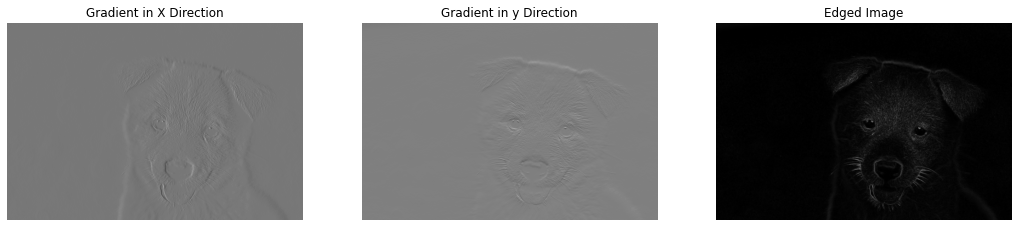

In [9]:
if __name__ == "__main__":
    image = cv2.imread('new_image.jpg', 0)
    apply_kernel(image, x_3_sobel, y_3_sobel)
